In [17]:
import os
import pandas as pd
import shutil
import cv2
import numpy as np
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import Dataset
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split
import torch
from sklearn.preprocessing import LabelEncoder
import torch.optim as optim
from torch.utils.data import TensorDataset
from torchvision import models
import torch.nn as nn
from torchvision.models import resnet18, ResNet18_Weights
import os
import matplotlib.pyplot as plt

# Visualize Samples

original images

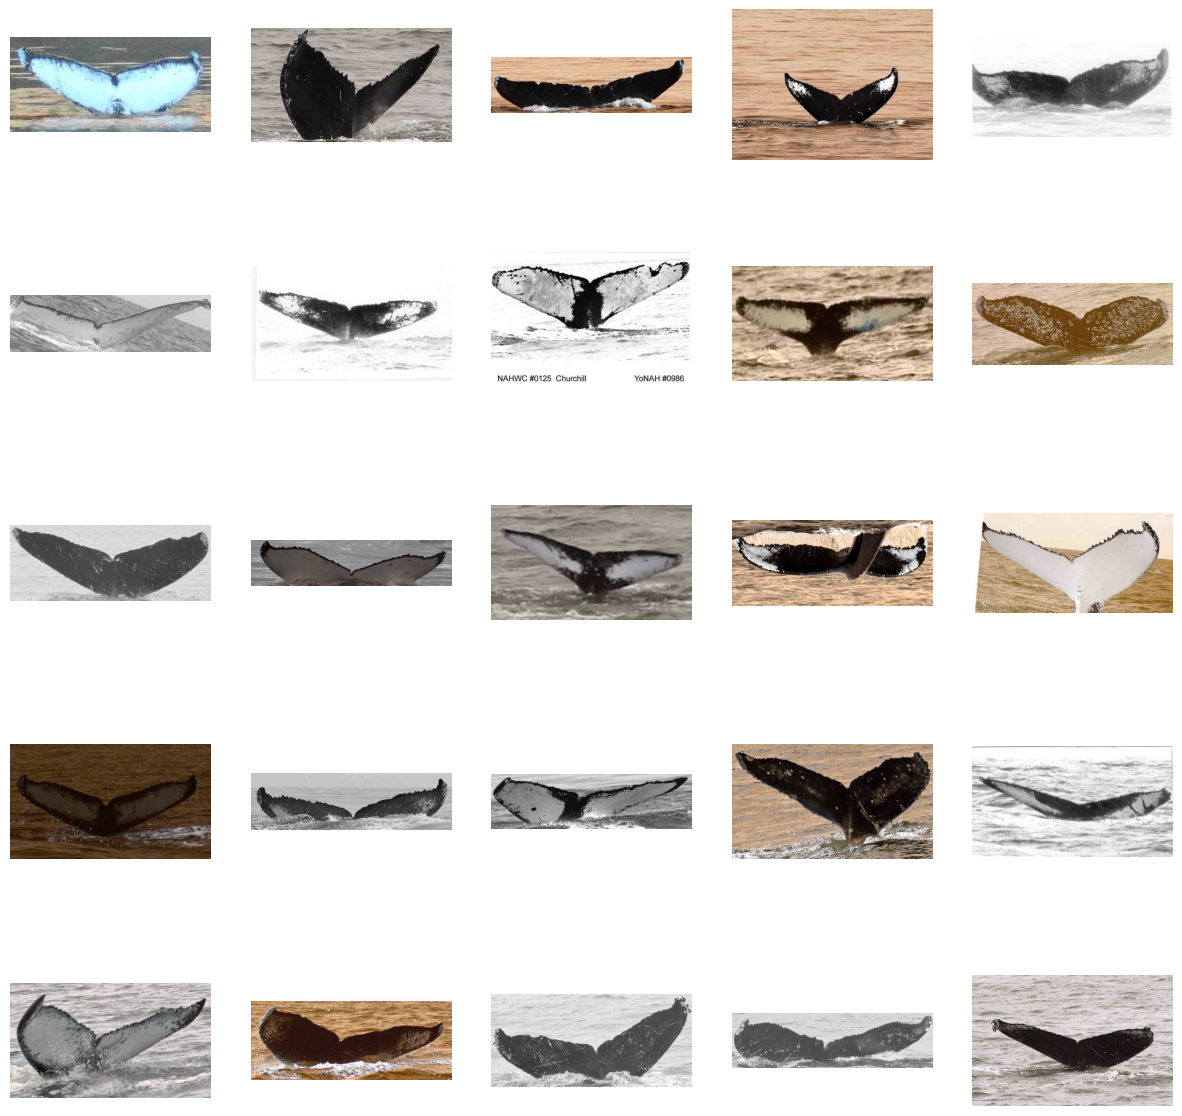

In [18]:
src_folder = 'train'

num_rows = 5
num_cols = 5
count = 0
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for image_file in os.listdir(src_folder):
  image_path = os.path.join(src_folder, image_file)
  image = cv2.imread(image_path)
  row = count // num_cols
  col = count % num_cols
  axs[row, col].imshow(image)
  axs[row, col].axis('off')
  count+=1
  if count == 25:
    break

resized images

In [19]:
def resize_image(image, target_size, method=cv2.INTER_CUBIC):
    resized_image = cv2.resize(image, target_size, interpolation=method)
    return resized_image

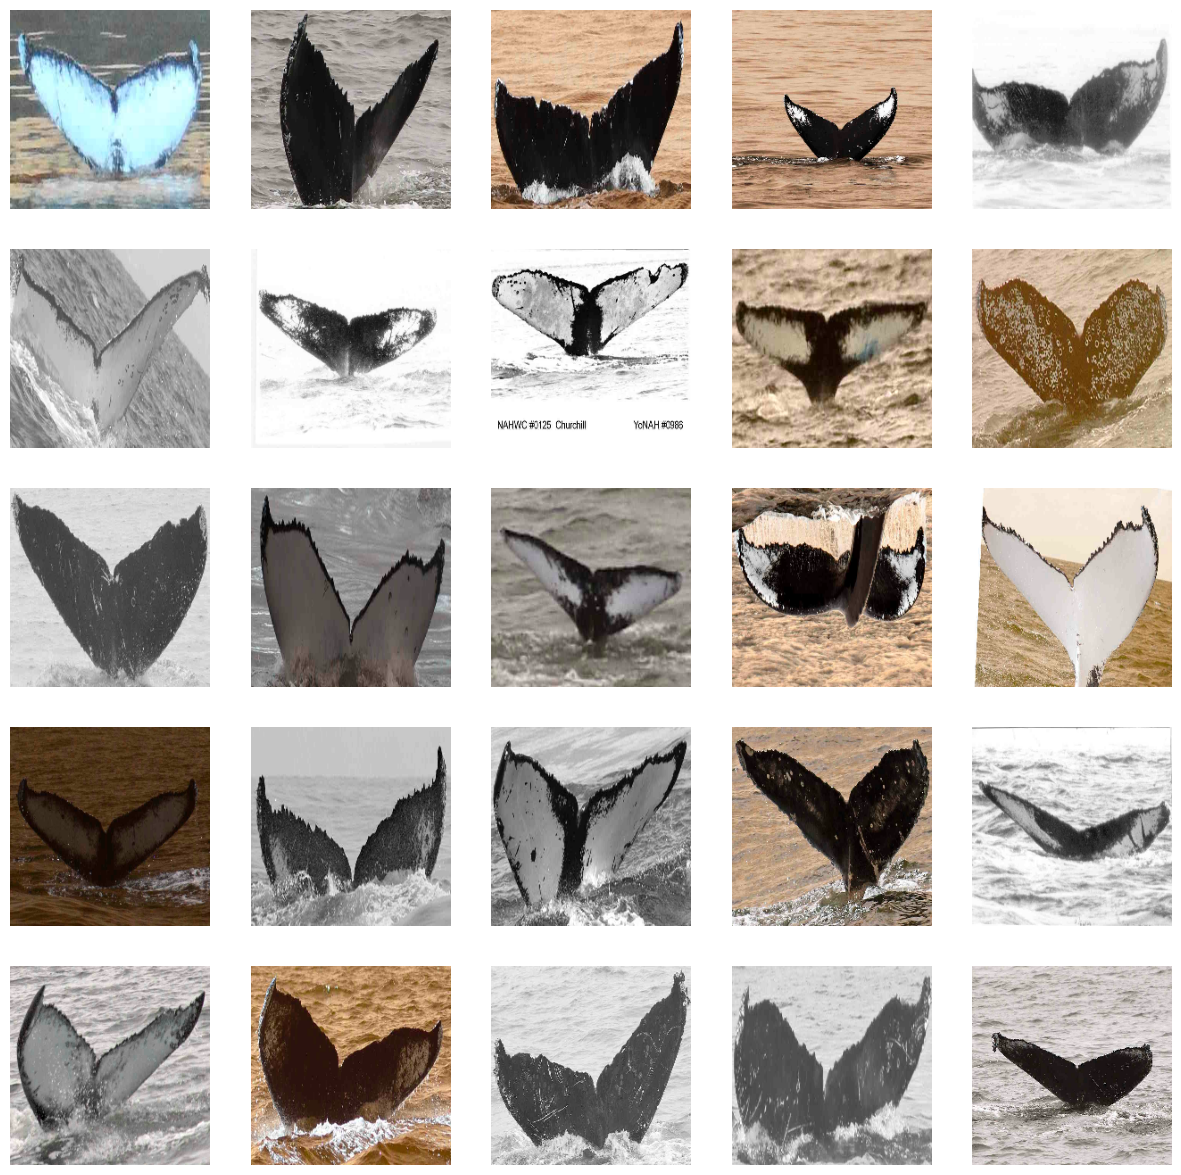

In [20]:
src_folder = 'train'

target_size = (224, 224)

num_rows = 5
num_cols = 5
count = 0
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for image_file in os.listdir(src_folder):
  image_path = os.path.join(src_folder, image_file)
  image = cv2.imread(image_path)
  resized_image = resize_image(image, target_size)
  row = count // num_cols
  col = count % num_cols
  axs[row, col].imshow(resized_image)
  axs[row, col].axis('off')
  count+=1
  if count == 25:
    break

average and motion blur

In [21]:
def average_blur(image, kernel_size=3):
    return cv2.blur(image, (kernel_size, kernel_size))

def motion_blur(image, kernel_size):
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    kernel[(kernel_size-1)//2, :] = 1.0/kernel_size
    return cv2.filter2D(image, -1, kernel)

In [22]:
def data_augmentation(image):
    # Apply average blur
    avg_blurred_image = average_blur(image)

    # Apply motion blur with a random kernel size from uniform distribution U(3, 5)
    kernel_size = np.random.randint(3, 5)
    motion_blurred_image = motion_blur(avg_blurred_image, kernel_size)

    return motion_blurred_image

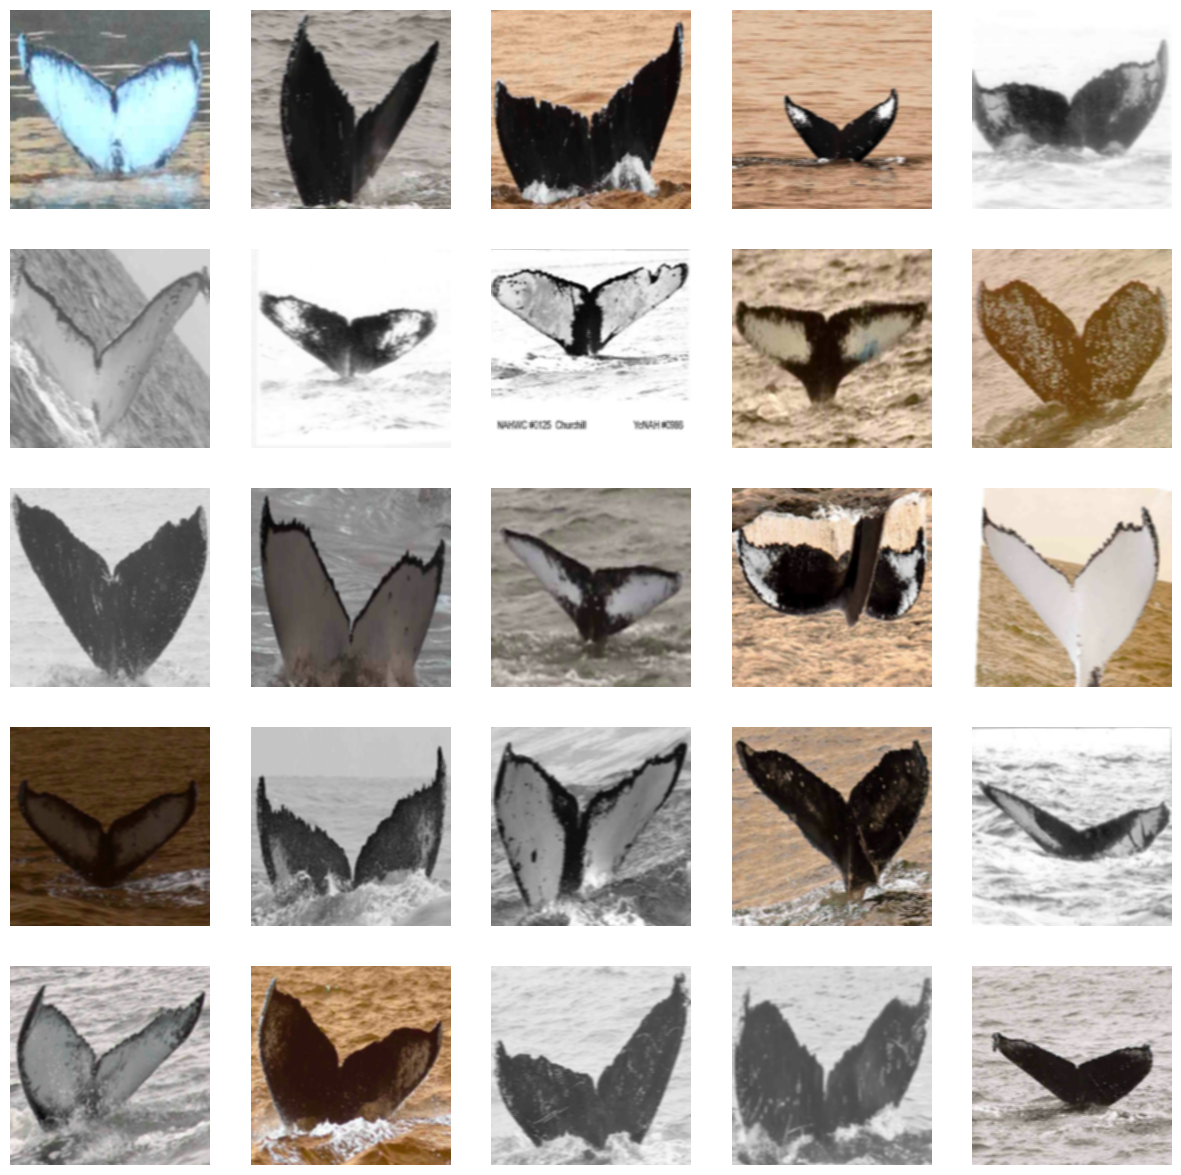

In [24]:
src_folder = 'train'
target_size = (224, 224)

num_rows = 5
num_cols = 5
count = 0
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for image_file in os.listdir(src_folder):
  image_path = os.path.join(src_folder, image_file)
  image = cv2.imread(image_path)
  resized_image = resize_image(image, target_size)
  augmented_image = data_augmentation(resized_image)
  row = count // num_cols
  col = count % num_cols
  axs[row, col].imshow(augmented_image)
  axs[row, col].axis('off')
  count+=1
  if count == 25:
    break

Random addition

In [36]:
def random_addition(image, interval=(-10, 10), per_channel_probability=0.5):
    h, w, c = image.shape
    if random.random() < per_channel_probability:
        addition_values = np.random.randint(interval[0], interval[1] + 1, c)
    else:
        addition_value = random.randint(interval[0], interval[1])
        addition_values = np.full(c, addition_value)

    return np.clip(image.astype(np.int16) + addition_values, 0, 255).astype(np.uint8)

In [37]:
def data_augmentation(image):
    # Apply average blur
    avg_blurred_image = average_blur(image)

    # Apply motion blur
    kernel_size = np.random.randint(3, 5)
    motion_blurred_image = motion_blur(avg_blurred_image, kernel_size)

    # Apply random addition
    image_with_addition = random_addition(motion_blurred_image)

    return image_with_addition

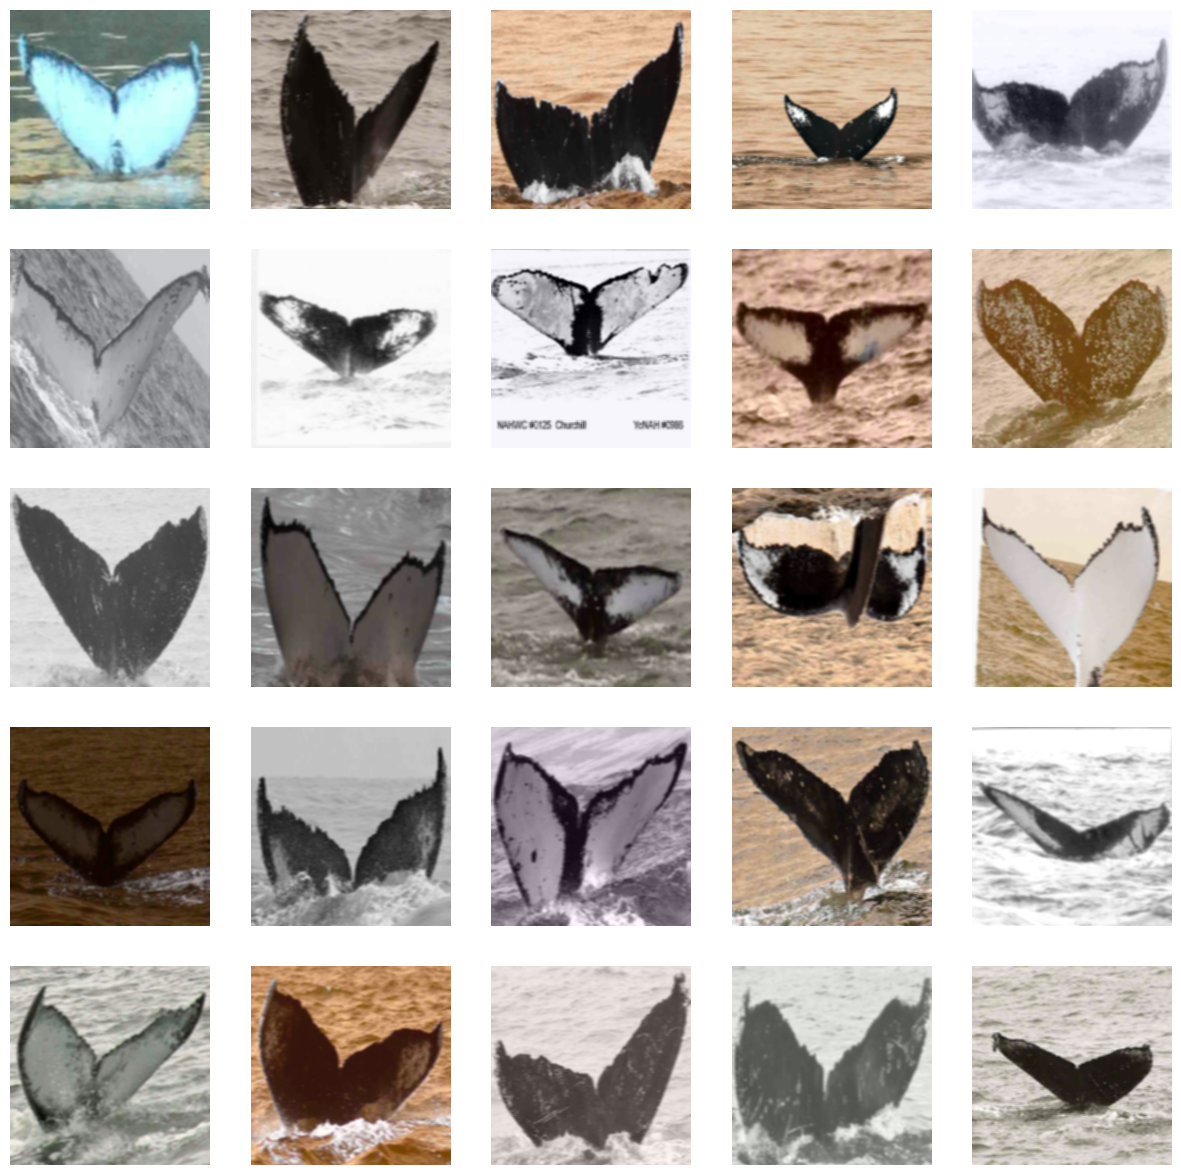

In [38]:
src_folder = 'train'
target_size = (224, 224)

num_rows = 5
num_cols = 5
count = 0
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for image_file in os.listdir(src_folder):
  image_path = os.path.join(src_folder, image_file)
  image = cv2.imread(image_path)
  resized_image = resize_image(image, target_size)
  
  augmented_image = data_augmentation(resized_image)
  row = count // num_cols
  col = count % num_cols
  axs[row, col].imshow(augmented_image)
  axs[row, col].axis('off')
  count+=1
  if count == 25:
    break

Random Multiplication

In [43]:
def random_multiplication(image, interval=(0.9, 1.1), per_channel_probability=0.5):
    h, w, c = image.shape
    if random.random() < per_channel_probability:
        multiplication_values = np.random.uniform(interval[0], interval[1], size=(1, 1, c))
    else:
        multiplication_value = random.uniform(interval[0], interval[1])
        multiplication_values = np.full((1, 1, c), multiplication_value)

    return np.clip(image.astype(np.float32) * multiplication_values, 0, 255).astype(np.uint8)

In [46]:
def data_augmentation(image):
    # Apply average blur
    avg_blurred_image = average_blur(image)

    # Apply motion blur
    kernel_size = np.random.randint(3, 5)
    motion_blurred_image = motion_blur(avg_blurred_image, kernel_size)


    # Apply random multiplication
    image_with_multiplication = random_multiplication(motion_blurred_image)

    return image_with_multiplication

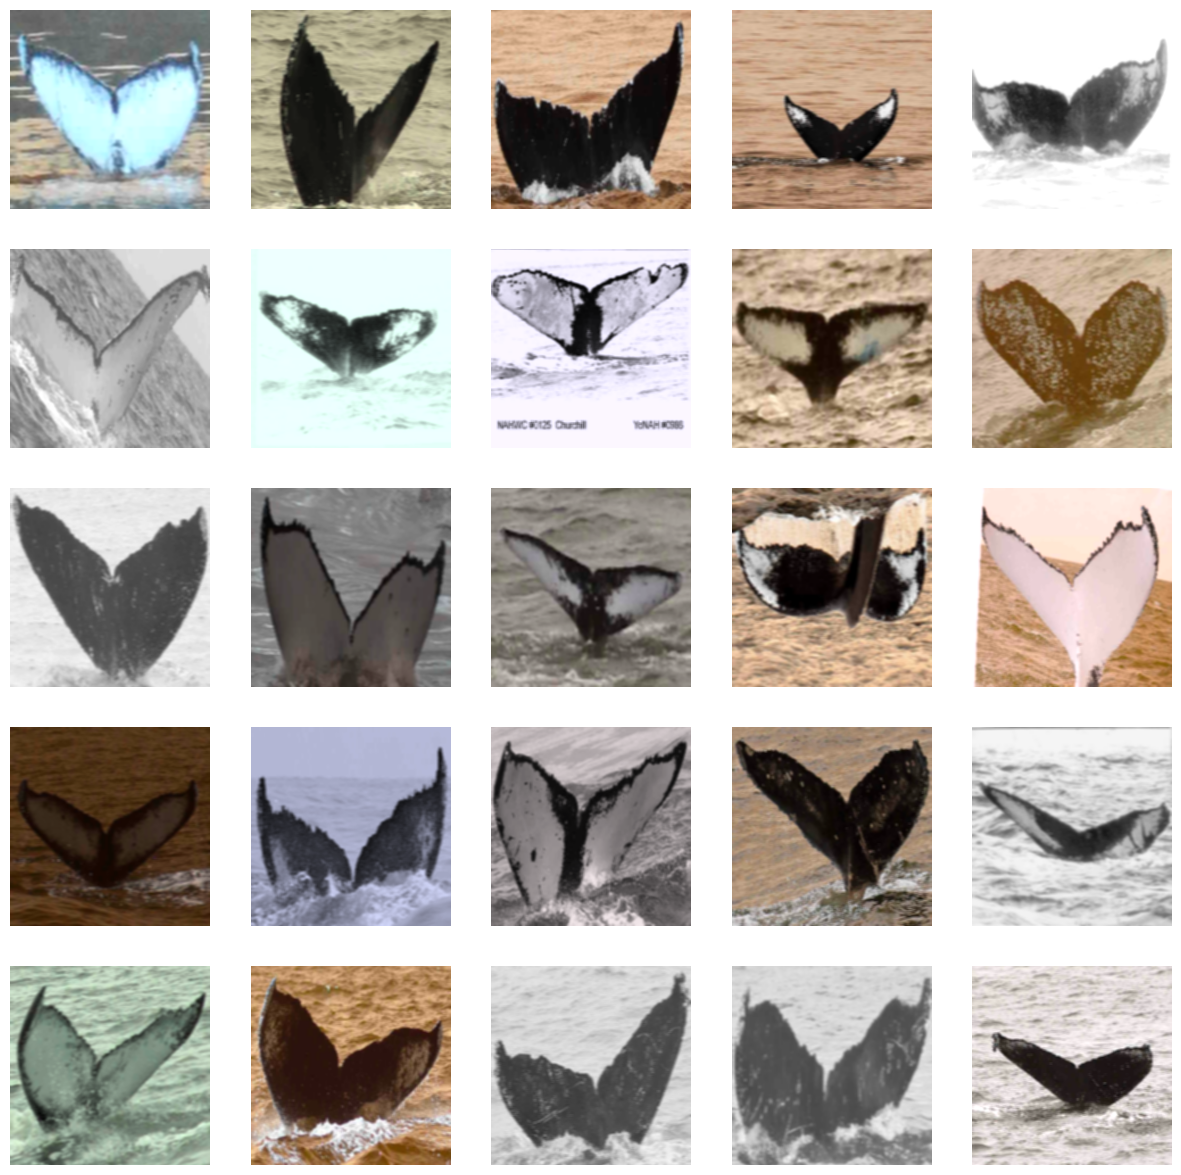

In [47]:
src_folder = 'train'
target_size = (224, 224)

num_rows = 5
num_cols = 5
count = 0
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for image_file in os.listdir(src_folder):
  image_path = os.path.join(src_folder, image_file)
  image = cv2.imread(image_path)
  resized_image = resize_image(image, target_size)
  
  augmented_image = data_augmentation(resized_image)
  row = count // num_cols
  col = count % num_cols
  axs[row, col].imshow(augmented_image)
  axs[row, col].axis('off')
  count+=1
  if count == 25:
    break

Translation

In [49]:
def data_augmentation(image):
    # Apply average blur
    avg_blurred_image = average_blur(image)

    # Apply motion blur with a random kernel size from uniform distribution U(3, 5)
    kernel_size = np.random.randint(3, 5)
    motion_blurred_image = motion_blur(avg_blurred_image, kernel_size)

    transformed_image = random_scale_translation_shear_rotation(motion_blurred_image)


    return transformed_image

In [50]:
def random_scale_translation_shear_rotation(image, scale_interval=(0.9, 1.1), translation_interval=(-0.05, 0.05), angle_interval=(-10, 10)):
    h, w, c = image.shape

    # Scaling factors
    scale_x = random.uniform(scale_interval[0], scale_interval[1])
    scale_y = random.uniform(scale_interval[0], scale_interval[1])

    # Translation factors
    translation_x = int(random.uniform(translation_interval[0], translation_interval[1]) * w)
    translation_y = int(random.uniform(translation_interval[0], translation_interval[1]) * h)

    # Shearing and rotation angles
    shear_angle = random.uniform(angle_interval[0], angle_interval[1])
    rotation_angle = random.uniform(angle_interval[0], angle_interval[1])

    # Convert angles to radians
    shear_angle_rad = np.deg2rad(shear_angle)
    rotation_angle_rad = np.deg2rad(rotation_angle)

    # Affine transformation matrix
    M = np.float32([[scale_x * np.cos(rotation_angle_rad), -scale_y * np.sin(rotation_angle_rad + shear_angle_rad), translation_x],
                    [scale_x * np.sin(rotation_angle_rad), scale_y * np.cos(rotation_angle_rad + shear_angle_rad), translation_y]])

    # Apply affine transformation
    transformed_image = cv2.warpAffine(image, M, (w, h), borderValue=(0, 0, 0))

    return transformed_image


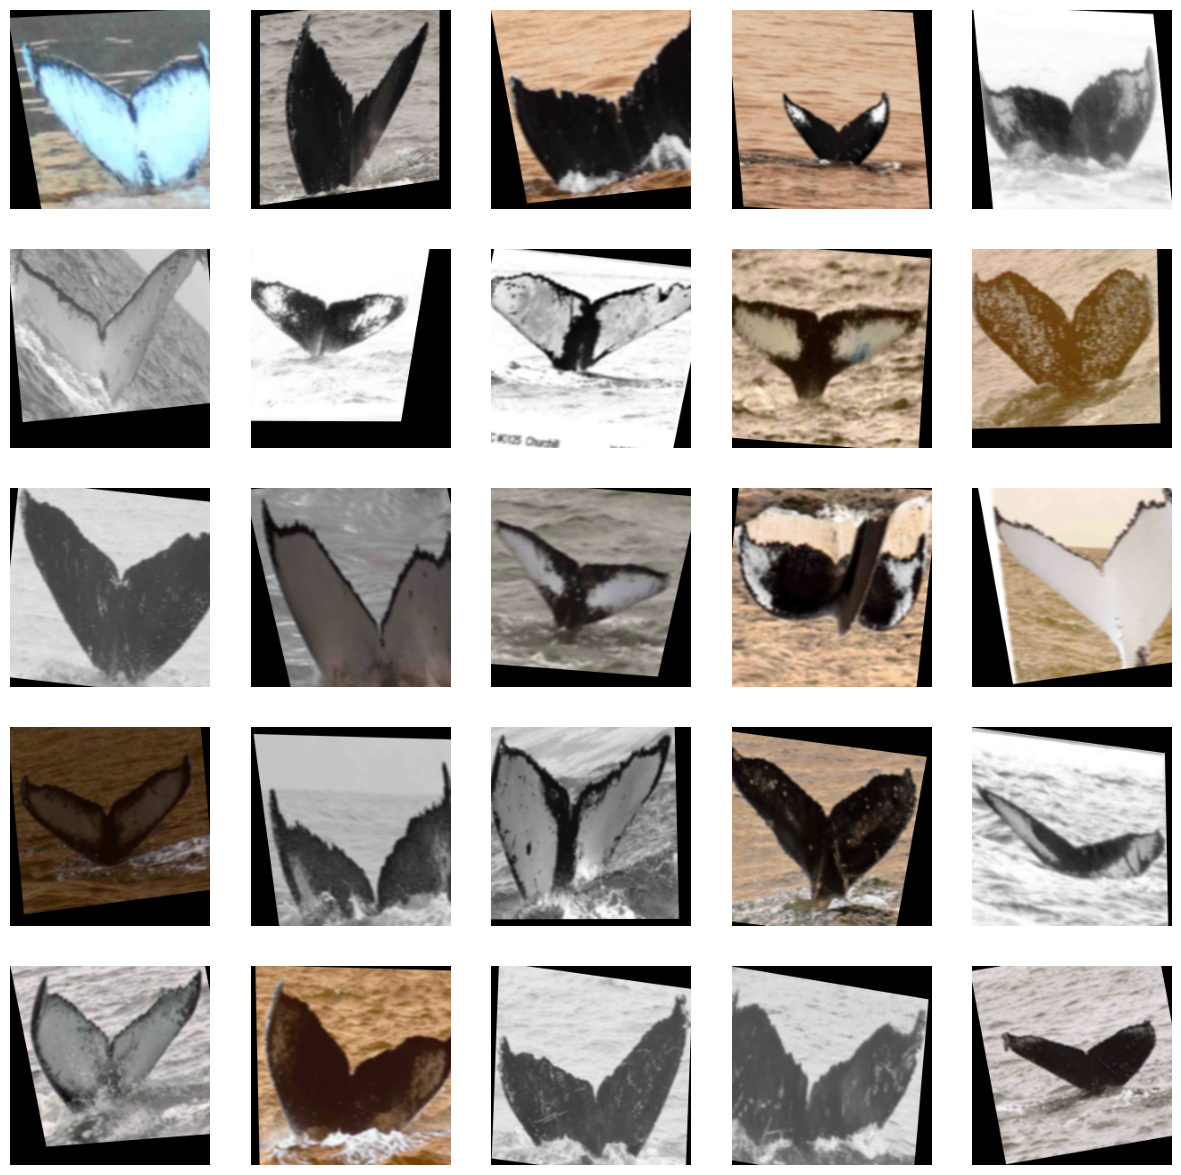

In [51]:
src_folder = 'train'
target_size = (224, 224)

num_rows = 5
num_cols = 5
count = 0
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for image_file in os.listdir(src_folder):
  image_path = os.path.join(src_folder, image_file)
  image = cv2.imread(image_path)
  resized_image = resize_image(image, target_size)
  augmented_image = data_augmentation(resized_image)
  row = count // num_cols
  col = count % num_cols
  axs[row, col].imshow(augmented_image)
  axs[row, col].axis('off')
  count+=1
  if count == 25:
    break

# Training

In [2]:
print(f"Total images in dataset: {len(os.listdir('train'))}")

Total images in dataset: 9850


In [3]:
def create_filtered_dataset(dataset_path, filtered_dataset_path, whale_id_dict):

  if os.path.exists(filtered_dataset_path):
    shutil.rmtree(filtered_dataset_path)
  
  os.makedirs(filtered_dataset_path)

  for whale_id, filenames in whale_id_dict.items():
    for filename in filenames:
      try:
        src_file = os.path.join(dataset_path, filename)
        dst_file = os.path.join(filtered_dataset_path, filename)
        if not os.path.exists(dst_file):
          shutil.copy(src_file, dst_file)
        pass
      except Exception as e:
        print(f"An error occurred: {e}")
        continue

In [4]:
def get_whaleIds(dataset_path, whale_ids_path):
  filenames = os.listdir(dataset_path)
  filenames = pd.DataFrame(filenames, columns = ['filenames'])
  whale_ids = pd.read_csv(whale_ids_path)

  filtered_whale_ids = []
  for whale_id, count in whale_ids['Id'].value_counts().items():
    if count >= 3:
      filtered_whale_ids.append(whale_id)
  filtered_whale_ids.remove('new_whale')

  return filtered_whale_ids


def get_whale_id_image_dict(dataset_path, whale_ids_path):
  whale_id_dict = {}
  whale_ids = pd.read_csv(whale_ids_path)
  filtered_whale_ids = get_whaleIds(dataset_path, whale_ids_path)
  for index, row in whale_ids.iterrows():
    if row['Id'] in filtered_whale_ids:
      if row['Id'] not in whale_id_dict:
        whale_id_dict[row['Id']] = []
      whale_id_dict[row['Id']].append(row['Image'])
  
  num_classes = len(filtered_whale_ids)

  return whale_id_dict, num_classes

In [5]:
def resize_image(image, target_size, method=cv2.INTER_CUBIC):
    resized_image = cv2.resize(image, target_size, interpolation=method)
    return resized_image

In [6]:
def average_blur(image, kernel_size=3):
    return cv2.blur(image, (kernel_size, kernel_size))

def motion_blur(image, kernel_size):
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    kernel[(kernel_size-1)//2, :] = 1.0/kernel_size
    return cv2.filter2D(image, -1, kernel)

In [7]:
def random_addition(image, interval=(-10, 10), per_channel_probability=0.5):
    h, w, c = image.shape
    if random.random() < per_channel_probability:
        addition_values = np.random.randint(interval[0], interval[1] + 1, c)
    else:
        addition_value = random.randint(interval[0], interval[1])
        addition_values = np.full(c, addition_value)

    return np.clip(image.astype(np.int16) + addition_values, 0, 255).astype(np.uint8)

def random_multiplication(image, interval=(0.9, 1.1), per_channel_probability=0.5):
    h, w, c = image.shape
    if random.random() < per_channel_probability:
        multiplication_values = np.random.uniform(interval[0], interval[1], size=(1, 1, c))
    else:
        multiplication_value = random.uniform(interval[0], interval[1])
        multiplication_values = np.full((1, 1, c), multiplication_value)

    return np.clip(image.astype(np.float32) * multiplication_values, 0, 255).astype(np.uint8)

In [8]:
def random_scale_translation_shear_rotation(image, scale_interval=(0.9, 1.1), translation_interval=(-0.05, 0.05), angle_interval=(-10, 10)):
    h, w, c = image.shape

    # Scaling factors
    scale_x = random.uniform(scale_interval[0], scale_interval[1])
    scale_y = random.uniform(scale_interval[0], scale_interval[1])

    # Translation factors
    translation_x = int(random.uniform(translation_interval[0], translation_interval[1]) * w)
    translation_y = int(random.uniform(translation_interval[0], translation_interval[1]) * h)

    # Shearing and rotation angles
    shear_angle = random.uniform(angle_interval[0], angle_interval[1])
    rotation_angle = random.uniform(angle_interval[0], angle_interval[1])

    # Convert angles to radians
    shear_angle_rad = np.deg2rad(shear_angle)
    rotation_angle_rad = np.deg2rad(rotation_angle)

    # Affine transformation matrix
    M = np.float32([[scale_x * np.cos(rotation_angle_rad), -scale_y * np.sin(rotation_angle_rad + shear_angle_rad), translation_x],
                    [scale_x * np.sin(rotation_angle_rad), scale_y * np.cos(rotation_angle_rad + shear_angle_rad), translation_y]])

    # Apply affine transformation
    transformed_image = cv2.warpAffine(image, M, (w, h), borderValue=(0, 0, 0))

    return transformed_image


In [9]:
def data_augmentation(image, target_size, whale_id, augumentated_data, output_feature, data_aug):
    # resize image to (224, 224)
    resized_image = resize_image(image, target_size)
    augumentated_data.append(resized_image)
    output_feature.append(whale_id)


    if data_aug:
      # Apply average blur
      avg_blurred_image = average_blur(resized_image)
      # Apply motion blur with a random kernel size from uniform distribution U(3, 5)
      kernel_size = np.random.randint(3, 5)
      motion_blurred_image = motion_blur(avg_blurred_image, kernel_size)
      augumentated_data.append(motion_blurred_image)
      output_feature.append(whale_id)

      # number = random.random()
      # if number >=0.5:
        # Apply random addition
      image_with_addition = random_addition(motion_blurred_image)
      augumentated_data.append(image_with_addition)
      output_feature.append(whale_id)


      # number = random.random()
      # if number >=0.5:
      # Apply random multiplication
      image_with_multiplication = random_multiplication(motion_blurred_image)
      augumentated_data.append(image_with_multiplication)
      output_feature.append(whale_id)

      # number = random.random()
      # if number >=0.5:
        # Apply transformation
      transformed_image = random_scale_translation_shear_rotation(motion_blurred_image)
      augumentated_data.append(transformed_image)
      output_feature.append(whale_id)

    return augumentated_data, output_feature

In [10]:
def prepare_dataset(filtered_dataset_path, whale_ids_path, target_size, transform, data_aug):
  augumentated_data = []
  output_feature = []
  whale_ids = pd.read_csv(whale_ids_path)
  progress_count = 0
  for image_file in os.listdir(filtered_dataset_path):
    progress_count += 1
    whale_id = whale_ids[whale_ids['Image'] == image_file]['Id'].iloc[0]
    image_path = os.path.join(filtered_dataset_path, image_file)
    image = cv2.imread(image_path)
    augumentated_data, output_feature = data_augmentation(image, target_size, whale_id, augumentated_data, output_feature, data_aug)

    if progress_count % 200 == 0:
      print(f"Progress: {progress_count} / {len(os.listdir(filtered_dataset_path))}")
    
  print(f"Progress: {progress_count} / {len(os.listdir(filtered_dataset_path))}")

  augmented_images_array = np.stack(augumentated_data)
  output_feature_array = np.array(output_feature)

  label_encoder = LabelEncoder()
  # Fit the LabelEncoder to your data
  label_encoder.fit(output_feature_array)
  # Transform the whale IDs to integers
  encoded_whaleids = label_encoder.transform(output_feature_array)

  train_images, test_images, train_labels, test_labels = train_test_split(augmented_images_array, encoded_whaleids, test_size=0.2, random_state=42)


  train_set = WhaleDataset(train_images, train_labels, transform)
  test_set = WhaleDataset(test_images, test_labels, transform)
  
  train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
  test_loader = DataLoader(test_set, batch_size=64, shuffle=True)


  return train_loader, test_loader

In [11]:
class WhaleDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
        return image, label

In [12]:
dataset_path = "train"
whale_ids_path = "train.csv"
filtered_dataset_path = "filtered_dataset"
data_aug = True
target_size=(224, 224)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

filtered_whale_ids = get_whaleIds(dataset_path, whale_ids_path)
whale_id_dict, num_classes= get_whale_id_image_dict(dataset_path, whale_ids_path)
create_filtered_dataset(dataset_path, filtered_dataset_path, whale_id_dict)
train_loader, test_loader = prepare_dataset(filtered_dataset_path, whale_ids_path, target_size, transform, data_aug)

Progress: 200 / 4752
Progress: 400 / 4752
Progress: 600 / 4752
Progress: 800 / 4752
Progress: 1000 / 4752
Progress: 1200 / 4752
Progress: 1400 / 4752
Progress: 1600 / 4752
Progress: 1800 / 4752
Progress: 2000 / 4752
Progress: 2200 / 4752
Progress: 2400 / 4752
Progress: 2600 / 4752
Progress: 2800 / 4752
Progress: 3000 / 4752
Progress: 3200 / 4752
Progress: 3400 / 4752
Progress: 3600 / 4752
Progress: 3800 / 4752
Progress: 4000 / 4752
Progress: 4200 / 4752
Progress: 4400 / 4752
Progress: 4600 / 4752
Progress: 4752 / 4752


In [13]:
print(f"Number if unique whale ids usin for training: {num_classes}")

Number if unique whale ids usin for training: 996


In [14]:
print(len(train_loader))
print(len(test_loader))

297
75


In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(weights=ResNet18_Weights.DEFAULT) # DEFAULT = IMAGENET1K_V2
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

for param in model.parameters():
    param.requires_grad = False

for param in model.layer4.parameters():
    param.requires_grad = True

In [16]:
# Training loop

loss_graph = []
train_acc_graph = []
test_acc_graph = []

num_epochs = 50
for epoch in range(num_epochs):
    running_loss = 0.0
    running_corrects = 0
    total = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_corrects += (preds == labels).sum().item()
        total += labels.size(0)
    
    epoch_accuracy = running_corrects / total
    loss_graph.append(running_loss / len(train_loader))
    train_acc_graph.append(epoch_accuracy * 100)

    
    print("<============ {} ============>".format(epoch+1))
    print('Loss: {:.3f}'.format((running_loss / len(train_loader))))
    print('Train Accuracy: {:.2f}% ({}/{})'.format(epoch_accuracy * 100, running_corrects, total))
    



    with torch.no_grad():
      total = 0
      correct = 0
      for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    test_acc_graph.append(100 * correct / total)

    print('Test Accuracy: {:.2f}% ({}/{})'.format(100 * correct / total, correct, total))  

    
    torch.save({
        'epoch': epoch+1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss,
    }, f'model_epoch{epoch+1}.pt')


<============ 1 ============>
Loss: 5.252
Train Accuracy: 24.48% (4653/19008)
Test Accuracy: 42.70% (2029/4752)
<============ 2 ============>
Loss: 3.238
Train Accuracy: 62.92% (11959/19008)
Test Accuracy: 68.03% (3233/4752)
<============ 3 ============>
Loss: 2.110
Train Accuracy: 82.33% (15650/19008)
Test Accuracy: 78.87% (3748/4752)
<============ 4 ============>
Loss: 1.457
Train Accuracy: 90.60% (17221/19008)
Test Accuracy: 84.39% (4010/4752)
<============ 5 ============>
Loss: 1.116
Train Accuracy: 94.00% (17868/19008)
Test Accuracy: 87.69% (4167/4752)
<============ 6 ============>
Loss: 0.946
Train Accuracy: 95.26% (18107/19008)
Test Accuracy: 88.45% (4203/4752)
<============ 7 ============>
Loss: 0.848
Train Accuracy: 96.21% (18287/19008)
Test Accuracy: 89.14% (4236/4752)
<============ 8 ============>
Loss: 0.804
Train Accuracy: 96.24% (18293/19008)
Test Accuracy: 88.40% (4201/4752)
<============ 9 ============>
Loss: 0.779
Train Accuracy: 96.43% (18329/19008)
Test Accuracy: 90.

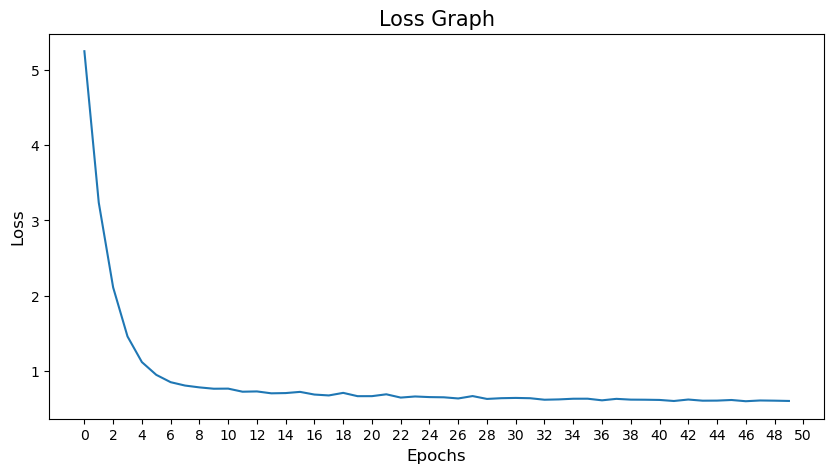

In [28]:
plt.figure(figsize=(10,5))
x = np.arange(0, num_epochs+1, 2)
plt.xticks(x)
plt.plot(loss_graph)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Loss Graph", fontsize=15)
plt.show()

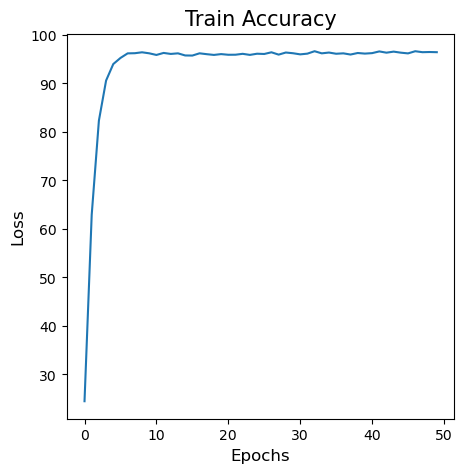

In [31]:
plt.figure(figsize=(5,5))
plt.plot(train_acc_graph)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Train Accuracy", fontsize=15)
plt.show()

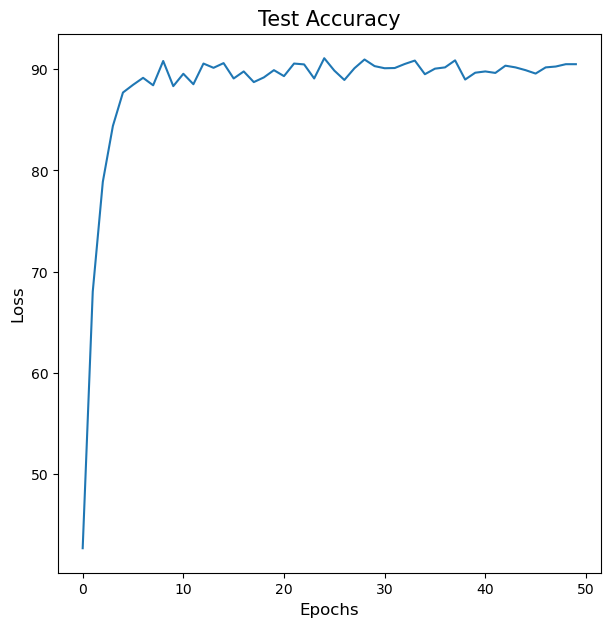

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.plot(test_acc_graph)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Test Accuracy", fontsize=15)
plt.show()

#### Load model and check test accuracy

In [34]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
checkpoint = torch.load('model_epoch50.pt')
model = models.resnet18(weights=None)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)
model = model.to(device)
model.load_state_dict(checkpoint['model_state_dict'])

model.eval()

correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test Accuracy: {:.2f}, ({}/{})'.format(100 * correct / total, correct, total))

Test Accuracy: 91.98, (4371/4752)
